In [19]:
"""
    根据成交量预测买入卖出时机
"""
import pandas_datareader as pdr
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
d = pdr.get_data_yahoo('000333.SZ', start=datetime.datetime(2015,10,1), end=datetime.datetime.now())

In [23]:
d.head()

,Volume
Date,
2015-10-08,56905641
2015-10-09,21642414
2015-10-12,41803016
2015-10-13,26002083
2015-10-14,31226974


In [41]:
signals = pd.DataFrame(index=d.index)
signals['signal'] = 0.0
signals['volume'] = d['Volume']
signals['avg_volume'] = d['Volume'].rolling(window=30, min_periods=1, center=False).mean().fillna(0)
signals['std_volume'] = d['Volume'].rolling(window=30, min_periods=1, center=False).std().fillna(0)
signals.head()

,signal,volume,avg_volume,std_volume
Date,,,,
2015-10-08,0.0,56905641,5.690564e+07,0.000000e+00
2015-10-09,0.0,21642414,3.927403e+07,2.493487e+07
2015-10-12,0.0,41803016,4.011702e+07,1.769197e+07
2015-10-13,0.0,26002083,3.658829e+07,1.607726e+07
2015-10-14,0.0,31226974,3.551603e+07,1.412825e+07


In [80]:
positions = pd.DataFrame(index=d.index).fillna(0.0)
positions['test'] = 100 * np.sign(np.random.randn(len(signals)))
test = positions.multiply(d['Adj Close'], axis='index').cumsum(axis=0)
test.head(20)

,test
Date,
2015-10-08,-1692.2520
2015-10-09,-3383.8862
2015-10-12,-5149.7992
2015-10-13,-6892.6131
2015-10-14,-8576.1294
2015-10-15,-6858.2780
2015-10-16,-5131.6907
2015-10-19,-6843.2969
2015-10-20,-8559.8935


In [50]:
f_factor = 2

In [57]:
signals['signal'] = np.where(np.all([signals['volume'] > signals['avg_volume'] + signals['std_volume'] * f_factor, d['Adj Close'] > d['Open']], axis=0), 1.0, 0.0)

In [59]:
signals.loc[signals.signal == 1.0].head()

,signal,volume,avg_volume,std_volume
Date,,,,
2015-12-21,1.0,70330125,3.984515e+07,1.470179e+07
2016-03-02,1.0,53361957,2.221926e+07,1.017123e+07
2016-05-10,1.0,48148741,2.506095e+07,1.062546e+07
2016-05-11,1.0,58911733,2.574047e+07,1.206995e+07
2016-07-12,1.0,115331093,3.902912e+07,2.295736e+07


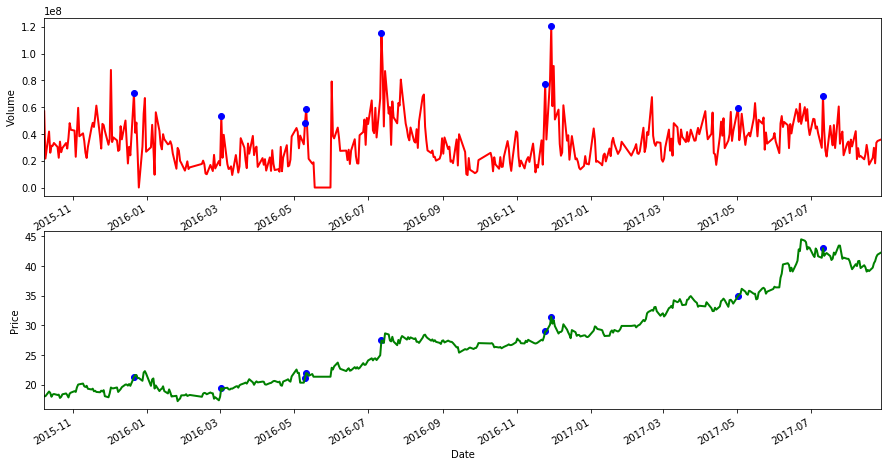

In [60]:
fig, ax1 = None, None
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211, ylabel='Volume')
daily_volume['Volume'].plot(ax=ax1, color='r', lw=2.)
ax1.plot(signals.loc[signals.signal == 1.0].index, signals['volume'][signals.signal == 1.0], 'bo')
ax2 = fig.add_subplot(212, ylabel='Price')
ax2.plot(signals.loc[signals.signal == 1.0].index, d['Close'][signals.signal == 1.0], 'bo')
d['Close'].plot(ax=ax2, color='g', lw=2.)
plt.show()